[Dataset](http://jse.amstat.org/v4n1/datasets.johnson.html)

Percentage of body fat, age, weight, height, and ten body circumference measurements (e.g., abdomen) are recorded for 252 men. Body fat, one measure of health, has been accurately estimated by an underwater weighing technique. Fitting body fat to the other measurements using multiple regression provides a convenient way of estimating body fat for men using only a scale and a measuring tape.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_context("notebook", font_scale=1.25)

In [2]:
data = pd.read_csv('fat.dat.txt', 
                   delim_whitespace=True, header=None)
data.columns = ['case', 'pbf_b', 'pbf_s', 'density', 'age', 'weight', 
                'height', 'bmi','fat_free_w', 'neck', 'chest', 'abdomen', 
                'hip', 'thigh', 'knee', 'ankle','biceps', 'forearm', 'wrist']
data.index = data['case']
data = data.drop(['case', 'fat_free_w'], axis=1)
# Remove a few data points (outliers, incorrect values)
data = data.drop([42, 182])
data = data[data['weight']<300]

Now that the data is loaded, we can check it out. We'll look at the first few cases, then make some plots so we can see how some of the data is distributed. The first two columns are percent body fat (PBF) using the Brozek and Siri formula's, respectively. Every column from "neck" on is the circumference at those locations.

In [3]:
data.head()

,pbf_b,pbf_s,density,age,weight,height,bmi,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
case,,,,,,,,,,,,,,,,,
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


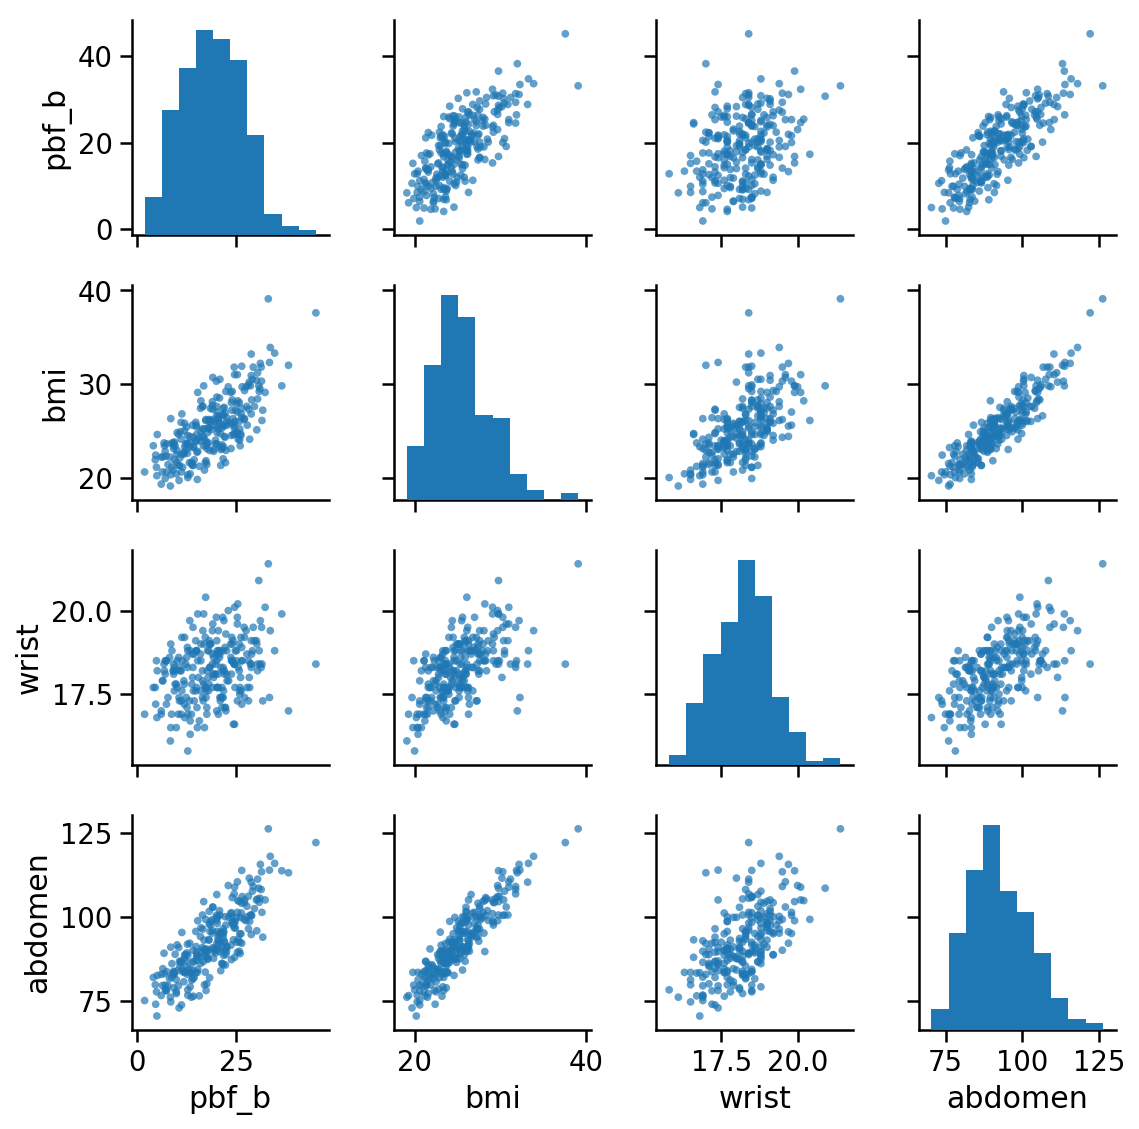

In [4]:
sb.pairplot(data[['pbf_b', 'bmi', 'wrist', 'abdomen']], 
                 size=2, plot_kws={'s':15,'edgecolor':'none','alpha':0.7})
plt.show()

From this we can see the percent body fat is correlated with weight and body measurements, while height has little if any effect. There are also correlations between body measurements and weight which we'll have to deal with later. I'm going to use a [linear regression model](http://en.wikipedia.org/wiki/Linear_regression) to predict percent body fat from the data.

A linear regression model is a formal way to draw a line through a set of data points. For instance, we can see that when we plot abdomen circumference on the x-axis and percent body fat on the y-axis (first row, fifth column), the data falls along a general upward sloped line. As we would expect, a larger gut indicates more body fat. We can get a decent estimate of this relationship by printing out the plot and drawing a line through the data points by hand. However, we want to find the "best" line. What I mean by "best" is that the line we draw has the least error predicting the existing data points.

We can define any line using an intercept, $\beta_0$,  and a slope, $\beta_1$, as $y = \beta_0 + \beta_1 x$. Here, $y$ is our dependent variable, percent body fat for example, and $x$ is the independent variable, such as abdomen circumference. Depending on the context and conventions, $x$ is also called the explanatory variable, regressor, feature, predictor, and more. Our model is a prediction of the percent body fat $\hat{y}$ using the abdomen circumference $x$,
$$
\hat{y}_i = \beta_0 + \beta_1 x_i,
$$
where the subscript $i$ indicates which data point we are using ($i=1$ is the first data point, and so on). Our goal here is to find values for $\beta_0$ and $\beta_1$ which give us the smallest error $\epsilon_i = y_i - \hat{y}_i$. We can actually find an exact solution to this problem if we minimize the sum of the squares of the errors, 

$$
SSE = \sum_{i=1}^{n} \left|\, y_i - \hat{y}_i \right|^2 ,
$$

using the [ordinary least squares](http://en.wikipedia.org/wiki/Ordinary_least_squares) method. Here I will use the excellent [scikits learn](http://scikit-learn.org/stable/) Python package to fit a linear model to our data.

In [5]:
from sklearn import linear_model

In [6]:
features = data[['abdomen']]

# Make an intercept column that is all 1
features.loc[:,'intercept'] = pd.Series(np.ones(len(features)), index=features.index)

# This is the part that fits the linear model to the data
linmodel = linear_model.LinearRegression(fit_intercept=False)
linmodel.fit(features, data['pbf_b'])

print("Coefficients\n"+ '-'*14)
for feature, coef in zip(features.columns, linmodel.coef_):
    print('{}: {:.3f} '.format(feature, coef))

Coefficients
--------------
abdomen: 0.616 
intercept: -37.991 


C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


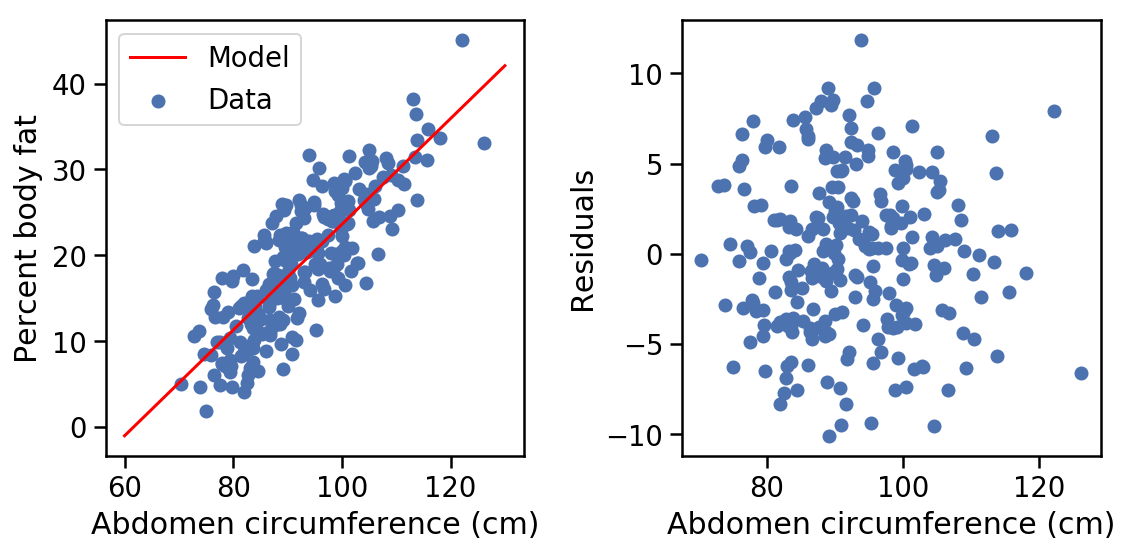

In [7]:
fig, (left, right) = plt.subplots(ncols=2, figsize=(8,4))
color = sb.color_palette('deep')[0]
left.scatter(data[['abdomen']], data[['pbf_b']], color=color, label='Data')
x = np.linspace(60, 130, 100)
left.plot(x, linmodel.coef_[1] + linmodel.coef_[0]*x, '-r', label='Model')
left.set_xlabel("Abdomen circumference (cm)")
left.set_ylabel("Percent body fat")
left.legend(loc='best')

y_hat = linmodel.coef_[1] + linmodel.coef_[0]*data[['abdomen']].values
residuals = data[['pbf_b']].values - y_hat
right.scatter(data[['abdomen']], residuals, color=color)
right.set_ylabel("Residuals")
_=right.set_xlabel("Abdomen circumference (cm)")
fig.tight_layout()

We see here that our model fits the data pretty well, but I'd like to measure the quality of the fit. A common way to measure the performance of the model is to split the data into a training set and a testing set. You fit the model to the training set, then measure how well it can predict the test set. This is known as cross-validation (CV) and is sort of the industry standard. I'll use scikits learn to perform *k-folds* CV. This method separates the data into $k$ parts (folds). Then, it uses $k-1$ folds to fit the model and then tests the model on the left out fold. Repeat this $k$ times using each fold to test only once.

In [8]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linmodel, features, y=data['pbf_b'],
                         cv=5, scoring='neg_mean_absolute_error')
print("Mean absolute error: {:.3f}".format(-scores.mean()))

Mean absolute error: 3.620


C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We can improve our model by including all the information we have in the data. Using a linear model makes this simple, we just add more coefficients. For each data point we have $m$ features and we can use them to predict the body fat percentage $\hat{y}$:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \cdots + \beta_m x_{i,m}
= \sum_{j=1}^{m} \beta_j x_j
$$

where the subscript $j$ indicates our data features and $x_0 = 1$. For convenience, we can write our model in matrix notation:

$$
\hat{y} = X \beta,
$$

$$
\hat{y} = \left( \begin{array}{c}
y_1    \\
y_2    \\
\vdots \\
y_n  \end{array} \right)
\hspace{2em} \beta = \left( \begin{array}{c}
\beta_0  \\
\beta_1  \\
\vdots \\
\beta_m  \end{array} \right)
\hspace{2em} X = \left( \begin{array}{ccccc}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,m}  \\
1 & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & x_{1,2} & \cdots & x_{n,m}  \end{array} \right)
$$

Again, our error is $ \mathbf{\epsilon} = \sum_{i=1}^{n} \left|\, y_i - \hat{y}_i \right|^2 $ which we want to minimize. There is an exact and unique solution for the coefficients that minimize the error:

$$
\hat{\beta} = \left( X^T X \right)^{-1}X^T y
$$


In [9]:
features = data[['height', 'weight', 'age', 'neck', 'chest', 'abdomen', 
                 'hip', 'thigh', 'knee', 'ankle','biceps', 'forearm', 
                 'wrist']]
features.loc[:,'intercept'] = pd.Series(np.ones(len(features)), 
                                        index=features.index)

linmodel = linear_model.LinearRegression(fit_intercept=False)
linmodel.fit(features, data['pbf_b'])

scores = cross_val_score(linmodel, features, y=data['pbf_b'],
                         cv=5, scoring='neg_mean_absolute_error')
print("Coefficients\n"+ '-'*14)
for feature, coef in zip(features.columns, linmodel.coef_):
    print('{}: {:.3f} '.format(feature, coef))

Coefficients
--------------
height: -0.248 
weight: -0.006 
age: 0.065 
neck: -0.355 
chest: -0.132 
abdomen: 0.839 
hip: -0.157 
thigh: 0.151 
knee: -0.070 
ankle: 0.161 
biceps: 0.164 
forearm: 0.250 
wrist: -1.663 
intercept: 7.259 


C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Since we know that many of our features are correlated, we can use [ridge regression](http://en.wikipedia.org/wiki/Tikhonov_regularization) to obtain a better prediction. Ridge regression is similar to normal linear regression, but we add a term to the error function that penalizes the size of the coefficients,

$$
\mathbf{\epsilon} = \sum_{i=1}^{n} \left|\, y_i - \hat{y}_i \right|^2 + \lambda \sum_j^m\beta_j^2 .
$$

The penalty pulls the coefficients towards zero, a process known as  *shrinkage*, and decreases the variance in the model, leading towards better predictions. The amount of shrinkage is controlled by the parameter $\lambda$, as $\lambda \rightarrow \infty$ all coefficients go to zero, and as $\lambda \rightarrow 0$ we get our normal linear regression. However, there is no way to know before hand what the best value for $\lambda$ is. I can find the best $\lambda$ by fitting a bunch of models with different $\lambda$ and choose the one with the least prediction error. This is typically done with (again) cross-validation and is available from scikits-learn.

I'll also need to scale the features so that all the coefficients are on the same scale, and center the dependent variable as well.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaled_features = StandardScaler().fit_transform(features)
target = data['pbf_b']-data['pbf_b'].mean()

ridge = linear_model.RidgeCV(alphas=np.logspace(-2,1,100), 
                             fit_intercept=False)
ridge.fit(scaled_features, target)
scores = cross_val_score(ridge, scaled_features, y=target,
                         cv=5, scoring='neg_mean_absolute_error')

print("Coefficients\n"+ '-'*14)
for feature, coef in zip(features.columns, linmodel.coef_):
    print('{}: {:.3f} '.format(feature, coef))

Coefficients
--------------
height: -0.248 
weight: -0.006 
age: 0.065 
neck: -0.355 
chest: -0.132 
abdomen: 0.839 
hip: -0.157 
thigh: 0.151 
knee: -0.070 
ankle: 0.161 
biceps: 0.164 
forearm: 0.250 
wrist: -1.663 
intercept: 7.259 


Using ridge regression does improve our model a bit. However, I don't want to have to measure ten things every time I want to calculate my body fat. What I would like to do is find a small number of features that still give me a good prediction. A good method for this is *lasso* regression which is similar to ridge regression in that it penalizes the size of the coefficients, but instead of simply shrinking them, it sets coefficients to exactly zero. Here the error function is

$$
\mathbf{\epsilon} = \sum_{i=1}^{n} \left|\, y_i - \hat{y}_i \right|^2 + \lambda \sum_j^m\beta_j .
$$

We can see how the coefficients start at 0 for large $\lambda$, then become non-zero as $\lambda$ is decreased.

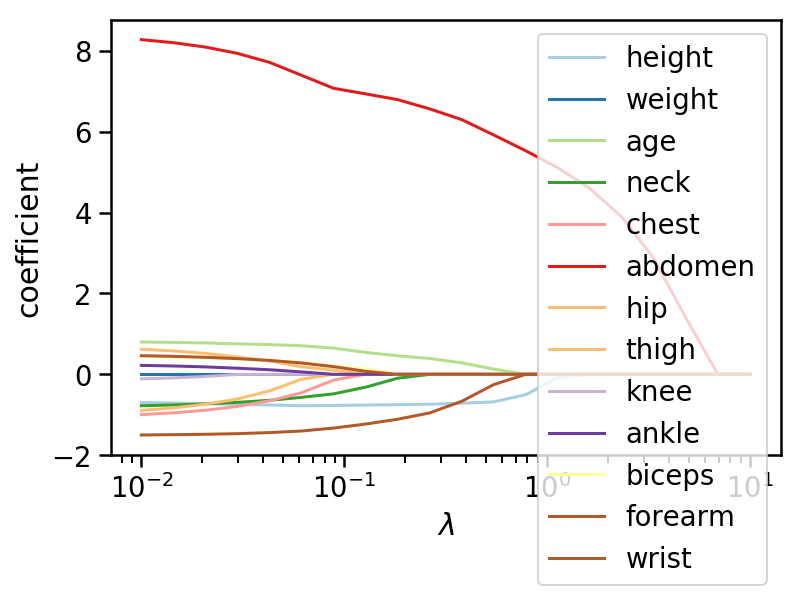

In [12]:
features = data[['height', 'weight', 'age', 'neck', 'chest', 'abdomen', 
                 'hip', 'thigh', 'knee', 'ankle', 'biceps', 'forearm', 
                 'wrist']]
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), 
                        index=features.index, columns=features.columns)
target = data['pbf_b']-data['pbf_b'].mean()

lambdas = np.logspace(1, -2, 20)
df = pd.DataFrame(index=features.columns, columns=lambdas)
for each in lambdas:
    lasso = linear_model.Lasso(alpha=each)
    lasso.fit(features, target)
    df[each] = lasso.coef_
df.T.plot(style='-', logx=True, colormap='Paired')
plt.xlabel('$\lambda$')
_ = plt.ylabel('coefficient')

We can see here that abdomen circumference is always a strong predictor. As $\lambda$ gets smaller, the coefficient for height becomes non-zero, then wrist circumference and age. I'm going to use these four features for my final model. It is reasonable that height and wrist circumference are negatively related to percent body fat. They indicate how long and how thick your bones are, respectively. Also, it seems that as one gets older, the percent body fat increases, holding everything else constant. I'm guessing this is from a change in the distribution of tissues, younger men having more muscle than older men. Now we can build a simpler model using only these features.

In [13]:
features = data[['height', 'age', 'abdomen', 'wrist']]

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), 
                        index=features.index, columns=features.columns)

target = data['pbf_b']-data['pbf_b'].mean()
ridge = linear_model.RidgeCV(alphas=np.logspace(-2,1), fit_intercept=False)
ridge.fit(features, target)
scores = cross_val_score(ridge, features, y=target,
                         cv=10, scoring='neg_mean_absolute_error')
for feature, coef in zip(features.columns, ridge.coef_):
    print('{}: {:.3f}'.format(feature, coef))
print("Mean abs error: {:.3f}".format(-scores.mean()))

height: -0.794
age: 0.639
abdomen: 7.117
wrist: -1.571
Mean abs error: 3.291


Finally, I can predict body fat percentage. I'll use the CV error previously calculated as an estimate of the uncertainty.

In [14]:
measurements = np.array([[71, 31, 88, 17.5]])
scaled = scaler.transform(measurements)
my_pbf = ridge.predict(scaled)+data['pbf_b'].mean()
print("PBF = {:.2f}% +/- {:.2f}%".format(my_pbf[0], -scores.mean()))

PBF = 16.17% +/- 3.29%
